In [2]:
#hide
import warnings
warnings.filterwarnings('ignore')

## Deep Learning 

Deep learning is a computer technique to extract and transform data–-with use cases ranging from human speech recognition to animal imagery classification–-by using multiple layers of neural networks. Each of these layers takes its inputs from previous layers and progressively refines them. The layers are trained by algorithms that minimize their errors and improve their accuracy. In this way, the network learns to perform a specified task. We will discuss training algorithms in detail in the next section.

Some of the tasks in different areas at which deep learning, or methods heavily using deep learning, is now the best in the world:

- Natural language processing (NLP):: Answering questions; speech recognition; summarizing documents; classifying documents; finding names, dates, etc. in documents; searching for articles mentioning a concept
- Computer vision:: Satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles
- Medicine:: Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
- Biology:: Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
- Image generation:: Colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists
- Recommendation systems:: Web search; product recommendations; home page layout
- Robotics:: Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up
- Other applications:: Financial and logistical forecasting, text to speech, and much more...

What is remarkable is that deep learning has such varied application yet nearly all of deep learning is based on a single type of model, the neural network.


## Neural Networks: A Brief History

In 1943 Warren McCulloch, a neurophysiologist, and Walter Pitts, a logician, teamed up to develop a mathematical model of an artificial neuron. In their [paper](https://link.springer.com/article/10.1007/BF02478259) "A Logical Calculus of the Ideas Immanent in Nervous Activity" they declared that:

> : Because of the “all-or-none” character of nervous activity, neural events and the relations among them can be treated by means of propositional logic. It is found that the behavior of every net can be described in these terms.

McCulloch and Pitts realized that a simplified model of a real neuron could be represented using simple addition and threshold.

<img alt="Natural and artificial neurons" width="500" caption="Natural and artificial neurons" src="images/Lesson1_neuron.png" id="neuron"/>

Rosenblatt further developed the artificial neuron to give it the ability to learn. Even more importantly, he worked on building the first device that actually used these principles, the Mark I Perceptron. 

Minsky & Papert, wrote a book called _Perceptrons_ (MIT Press), where they showed that a single layer of these devices was unable to learn some simple but critical mathematical functions (such as XOR). In the same book, they also showed that using multiple layers of the devices would allow these limitations to be addressed. Unfortunately, only the first of these insights was widely recognized. As a result, the global academic community nearly entirely gave up on neural networks for the next two decades.

Perhaps the most pivotal work in neural networks in the last 50 years was the multi-volume *Parallel Distributed Processing* (PDP) by David Rumelhart, James McClellan, and the PDP Research Group, released in 1986 by MIT Press. Chapter 1 lays out a similar hope to that shown by Rosenblatt:

> People are smarter than today's computers because the brain employs a basic computational architecture that is more suited to deal with a central aspect of the natural information processing tasks that people are so good at. ...We will introduce a computational framework for modeling cognitive processes that seems… closer than other frameworks to the style of computation as it might be done by the brain.

The premise that PDP is using here is that traditional computer programs work very differently to brains, and that might be why computer programs had been (at that point) so bad at doing things that brains find easy (such as recognizing objects in pictures). The authors claimed that the PDP approach was "closer 
than other frameworks" to how the brain works, and therefore it might be better able to handle these kinds of tasks.

In fact, the approach laid out in PDP is very similar to the approach used in today's neural networks. The book defined parallel distributed processing as requiring:

1. A set of *processing units*
1. A *state of activation*
1. An *output function* for each unit 
1. A *pattern of connectivity* among units 
1. A *propagation rule* for propagating patterns of activities through the network of connectivities 
1. An *activation rule* for combining the inputs impinging on a unit with the current state of that unit to produce an output for the unit
1. A *learning rule* whereby patterns of connectivity are modified by experience 
1. An *environment* within which the system must operate

Although researchers showed 30 years ago that to get practical good performance you need to use more than 2 layers of neurons, it is only in the last decade that this principle has been more widely appreciated and applied. Neural networks are now finally living up to their potential, thanks to the use of more layers, coupled with the capacity to do so due to improvements in computer hardware, increases in data availability, and algorithmic tweaks that allow neural networks to be trained faster and more easily.

## How to Learn Deep Learning

The hardest part of deep learning is artisanal: how do you know if you've got enough data, whether it is in the right format, if your model is training properly, and, if it's not, what you should do about it? That is why we believe in learning by doing. As with basic data science skills, with deep learning you only get better through practical experience. Trying to spend too much time on the theory can be counterproductive. The key is to just code and try to solve problems: the theory can come later, when you have context and motivation.

## The Software: PyTorch, fastai, and Jupyter

After PyTorch came out in 2017, it has become the world's fastest-growing deep learning library and is already used for most research papers at top conferences. This is generally a leading indicator of usage in industry, because these are the papers that end up getting used in products and services commercially. 

PyTorch works best as a low-level foundation library, providing the basic operations for higher-level functionality. The fastai library is the most popular library for adding this higher-level functionality on top of PyTorch. 

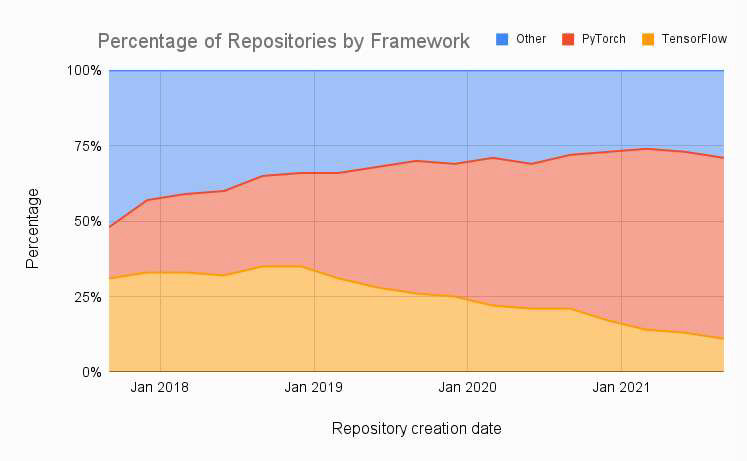

However, it doesn't really matter what software you learn, because it takes only a few days to learn to switch from one library to another. What really matters is learning the deep learning foundations and techniques properly. Our focus will be on using code that clearly expresses the concepts that you need to learn. 

## Your First Model

Following a top-down approach, we will begin by actually training an image classifier to recognize dogs and cats with almost 100% accuracy. 

The following code will perform three tasks:

1. A dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server you are using, and will then be extracted.
2. A *pretrained model* that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
3. The pretrained model will be *fine-tuned* using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

The first two steps only need to be run once on your GPU server. If you run the cell again, it will use the dataset and model that have already been downloaded, rather than downloading them again. 

In [1]:
#first_training
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/home/biagio/miniconda3/envs/iadb-dl/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,0.164661,0.023341,0.006766,06:33


epoch,train_loss,valid_loss,error_rate,time
0,0.055851,0.016828,0.006766,09:27


> Depending on your network speed, it might take a few minutes to download the pretrained model and dataset. Running `fine_tune` might take a minute or so. 

So, how do we know if this model is any good? In the last column of the table you can see the error rate, which is the proportion of images that were incorrectly identified. The error rate serves as our metric—our measure of model quality, chosen to be intuitive and comprehensible. As you can see, the model is nearly perfect, even though the training time was only a few seconds (not including the one-time downloading of the dataset and the pretrained model). In fact, the accuracy we've achieved already is far better than anybody had ever achieved just 10 years ago!

In [ ]:
#hide_output
uploader = widgets.FileUpload() # only on jupyter
uploader

Now you can pass the uploaded file to the model. Make sure that it is a clear photo of a single dog or a cat, and not a line drawing, cartoon, or similar. The notebook will tell you whether it thinks it is a dog or a cat, and how confident it is. Hopefully, you'll find that your model did a great job:

In [2]:
#hide
# for the sake of speed we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [3]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


### What Is a Neural Network?

If we regard a neural network as a mathematical function, it turns out to be a function which is extremely flexible depending on its weights. A mathematical proof called the *universal approximation theorem* shows that this function can solve any problem to any level of accuracy, in theory. The fact that neural networks are so flexible means that, in practice, they are often a suitable kind of model, and you can focus your effort on the process of training them—that is, of finding good weight assignments.

But what about that process?  One could imagine that you might need to find a new "mechanism" for automatically updating weights for every problem. This would be laborious. What we'd like here as well is a completely general way to update the weights of a neural network, to make it improve at any given task. Conveniently, this also exists and is called *stochastic gradient descent* (SGD).

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's generally not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data).

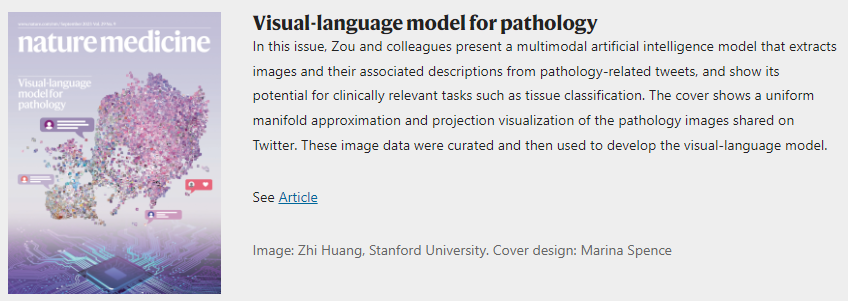

Another critical insight comes from considering how a model interacts with its environment. This can create a *positive feedback loop*, where the more the model is used, the more biased the data becomes, making the model even more biased, and so forth.


### How Our Image Recognizer Works

Let's see just how our image recognizer code maps to these ideas. 

The first line imports all of the fastai.vision library.

```python
from fastai.vision.all import *
```

This gives us all of the functions and classes we will need to create a wide variety of computer vision models.

> A lot of Python coders recommend avoiding importing a whole library like this (using the `import *` syntax), because in large software projects it can cause problems. However, the fastai library  will only import the necessary pieces into your environment.

The second line downloads a standard dataset from the [fast.ai datasets collection](https://course.fast.ai/datasets) (if not previously downloaded) to your server, extracts it (if not previously extracted), and returns a `Path` object with the extracted location:

```python
path = untar_data(URLs.PETS)/'images'
```

In the third line we define a function, `is_cat`, which labels cats based on a filename rule provided by the dataset creators:
```python
def is_cat(x): return x[0].isupper() # True if the first letter of the title is uppercase

We use that function in the fourth line, which tells fastai what kind of dataset we have and how it is structured:

```python
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
```

There are various different classes for different kinds of deep learning datasets and problems—here we're using `ImageDataLoaders`. The first part of the class name will generally be the type of data you have, such as image, or text.

The other important piece of information that we have to tell fastai is how to get the labels from the dataset. Computer vision datasets are normally structured in such a way that the label for an image is part of the filename, or path—most commonly the parent folder name. fastai comes with a number of standardized labeling methods, and ways to write your own. Here we're telling fastai to use the `is_cat` function we just defined.

Finally, we define the `Transform`s that we need. A `Transform` contains code that is applied automatically during training; fastai includes many predefined Transforms, and adding new ones is as simple as creating a Python function. There are two kinds: `item_tfms` are applied to each item (in this case, each item is resized to a 224-pixel square), while `batch_tfms` are applied to a *batch* of items at a time using the GPU, so they're particularly fast.

The Pet dataset contains 7,390 pictures of dogs and cats, consisting of 37 different breeds. Each image is labeled using its filename: for instance the file *great\_pyrenees\_173.jpg* is the 173rd example of an image of a Great Pyrenees breed dog in the dataset. The filenames start with an uppercase letter if the image is a cat, and a lowercase letter otherwise. We have to tell fastai how to get labels from the filenames, which we do by calling `from_name_func` (which means that labels can be extracted using a function applied to the filename), and passing `is_cat`, which returns `x[0].isupper()`, which evaluates to `True` if the first letter is uppercase (i.e., it's a cat).

The most important parameter to mention here is `valid_pct=0.2`. This tells fastai to hold out 20% of the data and *not use it for training the model at all*. This 20% of the data is called the *validation set*; the remaining 80% is called the *training set*. The validation set is used to measure the accuracy of the model. By default, the 20% that is held out is selected randomly. The parameter `seed=42` sets the *random seed* to the same value every time we run this code, which means we get the same validation set every time we run it—this way, if we change our model and retrain it, we know that any differences are due to the changes to the model, not due to having a different random validation set.

> fastai defaults `valid_pct` to `0.2`, so even if you forget, fastai will create a validation set for you!

fastai will *always* show the model's accuracy using *only* the validation set, *never* the training set. This is absolutely critical, because if you train a large enough model for a long enough time, it will eventually memorize the label of every item in your dataset! The result will not actually be a useful model, because what we care about is how well our model works on *previously unseen images*. That is always our goal when creating a model: for it to be useful on data that the model only sees in the future, after it has been trained.

Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is *overfitting*.


<img src="images/Lesson1_att_00000.png" alt="Example of overfitting" caption="Example of overfitting" id="img_overfit" width="700">

**Overfitting is the single most important and challenging issue** when training for all machine learning practitioners, and all algorithms.

The fifth line of the code training our image recognizer tells fastai to create a *convolutional neural network* (CNN) and specifies what *architecture* to use (i.e. what kind of model to create), what data we want to train it on, and what *metric* to use:

```python
learn = vision_learner(dls, resnet34, metrics=error_rate)
```

CNN it's the current state-of-the-art approach to creating computer vision models. Their structure is inspired by how the human vision system works.

Most of the time, however, picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called _ResNet_; it is both fast and accurate for many datasets and problems. The `34` in `resnet34` refers to the number of layers in this variant of the architecture (other options are `18`, `50`, `101`, and `152`). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.

A *metric* is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each *epoch*. In this case, we're using `error_rate`, which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly. Another common metric for classification is `accuracy` (which is just `1.0 - error_rate`). 

The concept of a metric may remind you of *loss*, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that is as close as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case.

`vision_learner` also has a parameter `pretrained`, which defaults to `True` (so it's used in this case, even though we haven't specified it), which sets the weights in your model to values that have already been trained by experts to recognize a thousand different categories across 1.3 million photos (using the famous [*ImageNet* dataset](http://www.image-net.org/)). A model that has weights that have already been trained on some other dataset is called a *pretrained model*. A pretrained model can be very useful, because it means that your model, before you've even shown it any of your data, is already very capable. And, as you'll see, in a deep learning model many of these capabilities are things you'll need, almost regardless of the details of your project. For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks.

When using a pretrained model, `vision_learner` will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the *head*.

Using pretrained models is the *most* important method we have to allow us to train more accurate models, more quickly, with less data, and less time and money. 


> Transfer learning: Using a pretrained model for a task different to what it was originally trained for.

The sixth line of our code tells fastai how to *fit* the model:

```python
learn.fine_tune(1)
```

The architecture only describes a *template* for a mathematical function; it doesn't actually do anything until we provide values for the millions of parameters it contains.

This is the key to deep learning —determining how to fit the parameters of a model to get it to solve your problem. In order to fit a model, we have to provide at least one piece of information: how many times to look at each image (known as number of *epochs*). The number of epochs you select will largely depend on how much time you have available, and how long you find it takes in practice to fit your model. If you select a number that is too small, you can always train for more epochs later.

But why is the method called `fine_tune`, and not `fit`? fastai actually *does* have a method called `fit`, which does indeed fit a model. But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. 

> Fine-tuning: A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

When you use the `fine_tune` method, fastai will use these tricks for you. There are a few parameters you can set, but in the default form shown here, it does two steps:

1. Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your dataset.
1. Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which, as we'll see, generally don't require many changes from the pretrained weights).

The *head* of a model is the part that is newly added to be specific to the new dataset. An *epoch* is one complete pass through the dataset. After calling `fit`, the results after each epoch are printed, showing the epoch number, the training and validation set losses (the "measure of performance" used for training the model), and any *metrics* you've requested (error rate, in this case).

### What Our Image Recognizer Learned

At this stage we have an image recognizer that is working very well, but we have no idea what it is actually doing! Although many people complain that deep learning results in impenetrable "black box" models (that is, something that gives predictions but that no one can understand), there is a vast body of research showing how to deeply inspect deep learning models, and get rich insights from them. Having said that, all kinds of machine learning models (including deep learning, and traditional statistical models) can be challenging to fully understand, especially when considering how they will behave when coming across data that is very different to the data used to train them.

In 2013 a PhD student, Matt Zeiler, and his supervisor, Rob Fergus, published the paper ["Visualizing and Understanding Convolutional Networks"](https://arxiv.org/pdf/1311.2901.pdf), which showed how to visualize the neural network weights learned in each layer of a model. They carefully analyzed the model that won the 2012 ImageNet competition, and used this analysis to greatly improve the model, such that they were able to go on to win the 2013 competition! This is the picture that they published of the first layer's weights:

<img src="images/Lesson1_layer1.png" alt="Activations of the first layer of a CNN" width="300" caption="Activations of the first layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer1">

This picture requires some explanation. For each layer, the image part with the light gray background shows the reconstructed weights pictures, and the larger section at the bottom shows the parts of the training images that most strongly matched each set of weights. For layer 1, what we can see is that the model has discovered weights that represent diagonal, horizontal, and vertical edges, as well as various different gradients. (Note that for each layer only a subset of the features are shown; in practice there are thousands across all of the layers.) These are the basic building blocks that the model has learned for computer vision. They have been widely analyzed by neuroscientists and computer vision researchers, and it turns out that these learned building blocks are very similar to the basic visual machinery in the human eye, as well as the handcrafted computer vision features that were developed prior to the days of deep learning. The next layer is represented in <<img_layer2>>.

<img src="images/Lesson1_layer2.png" alt="Activations of the second layer of a CNN" width="800" caption="Activations of the second layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer2">

For layer 2, there are nine examples of weight reconstructions for each of the features found by the model. We can see that the model has learned to create feature detectors that look for corners, repeating lines, circles, and other simple patterns. These are built from the basic building blocks developed in the first layer. For each of these, the right-hand side of the picture shows small patches from actual images which these features most closely match. For instance, the particular pattern in row 2, column 1 matches the gradients and textures associated with sunsets.

Next image shows the results of reconstructing the features of layer 3.

<img src="images/Lesson1_layer3.PNG" alt="Activations of the third layer of a CNN" width="800" caption="Activations of the third layer of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer3">

As you can see by looking at the righthand side of this picture, the features are now able to identify and match with higher-level semantic components, such as car wheels, text, and flower petals. Using these components, layers four and five can identify even higher-level concepts, as shown next:

<img src="images/Lesson1_layer4and5.PNG" alt="Activations of layers 4 and 5 of a CNN" width="800" caption="Activations of layers 4 and 5 of a CNN (courtesy of Matthew D. Zeiler and Rob Fergus)" id="img_layer4">

This article was studying an older model called *AlexNet* that only contained five layers. Networks developed since then can have hundreds of layers—so you can imagine how rich the features developed by these models can be! 

When we fine-tuned our pretrained model earlier, we adapted what those last layers focus on (flowers, humans, animals) to specialize on the cats versus dogs problem. More generally, we could specialize such a pretrained model on many different tasks.

### Jargon Recap

| Term | Meaning |
|---|:---|
|Label | The data that we're trying to predict, such as "dog" or "cat" |
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to |
|Model | The combination of the architecture with a particular set of parameters |
|Parameters | The values in the model that change what task it can do, and are updated through model training |
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels |
|Train | A synonym for _fit_ |
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned |
|Fine-tune | Update a pretrained model for a different task |
|Epoch | One complete pass through the input data |
|Loss | A measure of how good the model is, chosen to drive training via SGD |
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption |
|Validation set | A set of data held out from training, used only for measuring how good the model is |
|Training set | The data used for fitting the model; does not include any data from the validation set |
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training |
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks |



## Deep Learning Is Not Just for Image Classification

Deep learning's effectiveness for classifying images has been widely discussed in recent years, even showing _superhuman_ results on complex tasks like recognizing malignant tumors in CT scans. But it can do a lot more than this, as we will show here.

For instance, let's talk about something that is critically important for autonomous vehicles: localizing objects in a picture. If a self-driving car doesn't know where a pedestrian is, then it doesn't know how to avoid one! Creating a model that can recognize the content of every individual pixel in an image is called *segmentation*. Here is how we can train a segmentation model with fastai, using a subset of the [*Camvid* dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf) from the paper "Semantic Object Classes in Video: A High-Definition Ground Truth Database":

In [5]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.925781,2.794781,00:17


epoch,train_loss,valid_loss,time
0,2.343371,1.907666,00:19
1,2.024820,1.793504,00:18
2,1.830302,1.318863,00:18
3,1.649505,1.093789,00:19
4,1.479014,0.997317,00:19
5,1.328524,0.876969,00:19
6,1.200248,0.830620,00:19
7,1.097376,0.821130,00:18


We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image. As you can see, it classifies pretty well every pixel in every object. For instance, notice that all of the cars are overlaid with the same color and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label and the right is the prediction from the model):

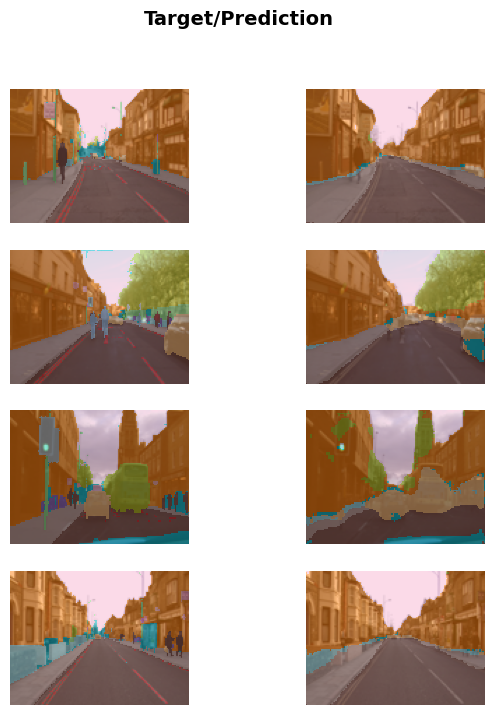

In [7]:
learn.show_results(max_n=4, figsize=(7,8))

## Validation Sets and Test Sets

As we've discussed, the goal of a model is to make predictions about data. But the model training process is fundamentally dumb. If we trained a model with all our data, and then evaluated the model using that same data, we would not be able to tell how well our model can perform on data it hasn’t seen. Without this very valuable piece of information to guide us in training our model, there is a very good chance it would become good at making predictions about that data but would perform poorly on new data.

To avoid this, our first step was to split our dataset into two sets: the *training set* (which our model sees in training) and the *validation set* (which is used only for evaluation). This lets us test that the model learns lessons from the training data that generalize to new data, the validation data.

One way to understand this situation is that, in a sense, we don't want our model to get good results by "cheating." If it makes an accurate prediction for a data item, that should be because it has learned characteristics of that kind of item, and not because the model has been shaped by *actually having seen that particular item*.

Splitting off our validation data means our model never sees it in training and so is completely untainted by it, and is not cheating in any way. Right?

In fact, not necessarily. The situation is more subtle. This is because in realistic scenarios we rarely build a model just by training its weight parameters once. Instead, we are likely to explore many versions of a model through various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors we will discuss in upcoming chapters. Many of these choices can be described as choices of *hyperparameters*. The word reflects that they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters.

The problem is that even though the ordinary training process is only looking at predictions on the training data when it learns values for the weight parameters, the same is not true of us. We, as modelers, are evaluating the model by looking at predictions on the validation data when we decide to explore new hyperparameter values! So subsequent versions of the model are, indirectly, shaped by us having seen the validation data. Just as the automatic training process is in danger of overfitting the training data, we are in danger of overfitting the validation data through human trial and error and exploration.

The solution to this conundrum is to introduce another level of even more highly reserved data, the *test set*. Just as we hold back the validation data from the training process, we must hold back the test set data even from ourselves. It cannot be used to improve the model; it can only be used to evaluate the model at the very end of our efforts. In effect, we define a hierarchy of cuts of our data, based on how fully we want to hide it from training and modeling processes: training data is fully exposed, the validation data is less exposed, and test data is totally hidden. This hierarchy parallels the different kinds of modeling and evaluation processes themselves—the automatic training process with back propagation, the more manual process of trying different hyper-parameters between training sessions, and the assessment of our final result.

The test and validation sets should have enough data to ensure that you get a good estimate of your accuracy. If you're creating a cat detector, for instance, you generally want at least 30 cats in your validation set. That means that if you have a dataset with thousands of items, using the default 20% validation set size may be more than you need. On the other hand, if you have lots of data, using some of it for validation probably doesn't have any downsides.

Having two levels of "reserved data"—a validation set and a test set, with one level representing data that you are virtually hiding from yourself—may seem a bit extreme. But the reason it is often necessary is because models tend to gravitate toward the simplest way to do good predictions (memorization), and we as fallible humans tend to gravitate toward fooling ourselves about how well our models are performing. The discipline of the test set helps us keep ourselves intellectually honest. That doesn't mean we *always* need a separate test set—if you have very little data, you may need to just have a validation set—but generally it's best to use one if at all possible.


### Use Judgment in Defining Test Sets

To do a good job of defining a validation set (and possibly a test set), you will sometimes want to do more than just randomly grab a fraction of your original dataset. Remember: a key property of the validation and test sets is that they must be representative of the new data you will see in the future. This may sound like an impossible order! By definition, you haven’t seen this data yet. But you usually still do know some things.

It's instructive to look at a few example cases. Many of these examples come from predictive modeling competitions on the [Kaggle](https://www.kaggle.com/) platform, which is a good representation of problems and methods you might see in practice.

One case might be if you are looking at time series data. For a time series, choosing a random subset of the data will be both too easy (you can look at the data both before and after the dates you are trying to predict) and not representative of most business use cases (where you are using historical data to build a model for use in the future). If your data includes the date and you are building a model to use in the future, you will want to choose a continuous section with the latest dates as your validation set (for instance, the last two weeks or last month of available data).

Suppose you want to split the time series data in <<timeseries1>> into training and validation sets.

<img src="images/timeseries1.png" width="400" id="timeseries1" caption="A time series" alt="A serie of values">

A random subset is a poor choice (too easy to fill in the gaps, and not indicative of what you'll need in production), as we can see in <<timeseries2>>.

<img src="images/timeseries2.png" width="400" id="timeseries2" caption="A poor training subset" alt="Random training subset">

Instead, use the earlier data as your training set (and the later data for the validation set), as shown in <<timeseries3>>.

<img src="images/timeseries3.png" width="400" id="timeseries3" caption="A good training subset" alt="Training subset using the data up to a certain timestamp">

A second common case is when you can easily anticipate ways the data you will be making predictions for in production may be *qualitatively different* from the data you have to train your model with.

### Further Research

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.